# Latency Graphs

In [1]:
#!pip3 install matplotlib pandas
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
%matplotlib inline

In [8]:
# LevelDB

level_df = pd.read_csv("/home/shaanzie/Desktop/LSMTProject/level-results/leveldb-fillseq-latency.csv")

compact_time = []
with open("/home/shaanzie/Desktop/LSMTProject/level-results/LOG", "r") as compact_file:
    for line in compact_file.readlines():
        if("compacted" in line or "Compacting" in line):
            inp = line.split(" ")[0]
            compact_time.append(inp.split("-")[1])

def find_time(time):
    f = time.split(".")[0]
    try:
        s = str(time.split(".")[1])[:2]
    except IndexError:
        s = 0
    hours = int(f.split(":")[0])*60*60*100
    mins = int(f.split(":")[1])*60*100
    sec = int(f.split(":")[2])*100
    return hours + mins + sec + int(s)

timestamps =[]
# level_df
for index, row in level_df.iterrows():
    timestamps.append(row['Timestamp'])

timestamps.sort()
print(timestamps[-1], find_time(compact_time[0]))
    
# plt.plot(timestamps,level_df['Latency'], label='Latency', color='r')
# for i in compact_time:
#     plt.axvline(find_time(i))
# plt.xlabel("Timestamp\n\nLevelDB-Workload A")
# plt.ylabel("Latency(ms)")
# plt.legend()
# # plt.savefig("/home/shaanzie/Desktop/LSMTProject/LevelDB-WorkloadA.png")
# plt.show()

KeyboardInterrupt: 

/home/shaanzie/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


TypeError: 'value' must be an instance of str or bytes, not a int

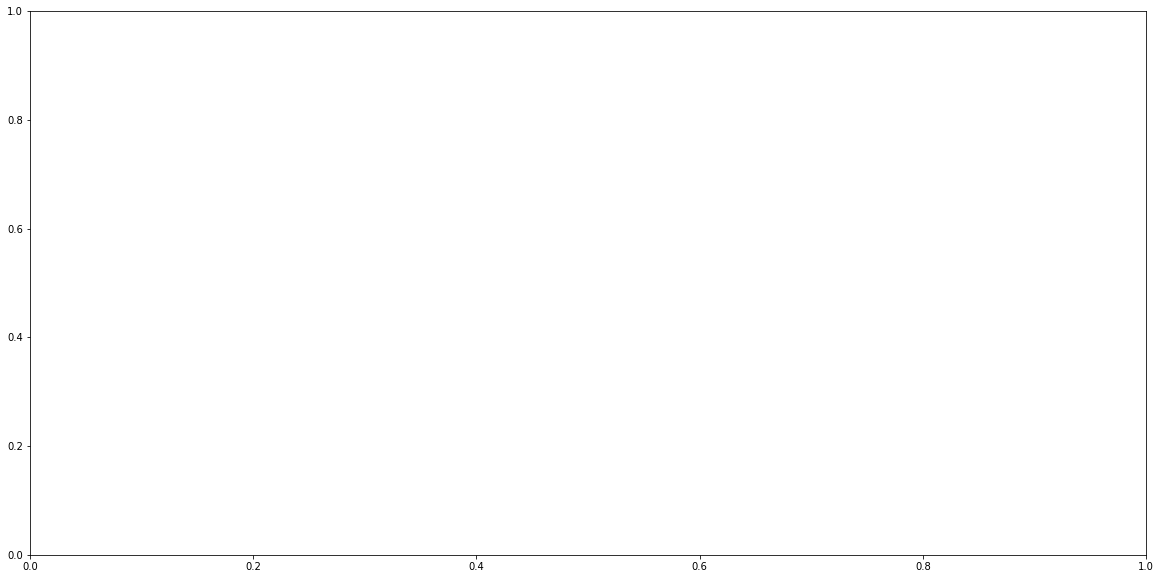

In [10]:
# LevelDB

level_df = pd.read_csv("/home/shaanzie/Desktop/LSMTProject/level-results/leveldb-fillseq-latency.csv", names=['Timestamp', 'Latency'])

compact_done_time = []
compact_start_time = []

with open("/home/shaanzie/Desktop/LSMTProject/level-results/LOG", "r") as compact_file:
    for line in compact_file.readlines():
        if("compacted" in line):
            inp = line.split(";")[0]
            compact_done_time.append(int(inp))
#         if("Compacting" in line):
#             inp = line.split(";")[0]
#             compact_start_time.append(int(inp))
            
plt.figure(figsize=(20,10))
plt.plot(level_df['Timestamp'],level_df['Latency'], label='Latency', color='r')
for xc in compact_done_time:
    plt.axvline(x=xc, color='b')
# for xc in compact_start_time:
#     plt.axvline(x=xc, color='g')
plt.xlabel("Timestamp\n\nLevelDB")
plt.ylabel("Latency(ms)")
plt.legend()
# plt.savefig("/home/shaanzie/Desktop/LSMTProject/LevelDB.png")
plt.show()

In [11]:
# LevelDB

level_df = pd.read_csv("/home/shaanzie/Desktop/LSMTProject/level-results/sar_leveldb-fillseq.csv")
print(level_df.columns)
plt.figure(figsize=(20,10))
plt.plot(level_df['%iowait'], label='KBCommit', color='r')
plt.xlabel("Timestamp\n\nLevelDB")
plt.ylabel("% Memory Usage")
plt.legend()
# plt.savefig("/home/shaanzie/Desktop/LSMTProject/LevelDB.png")
plt.show()

EmptyDataError: No columns to parse from file

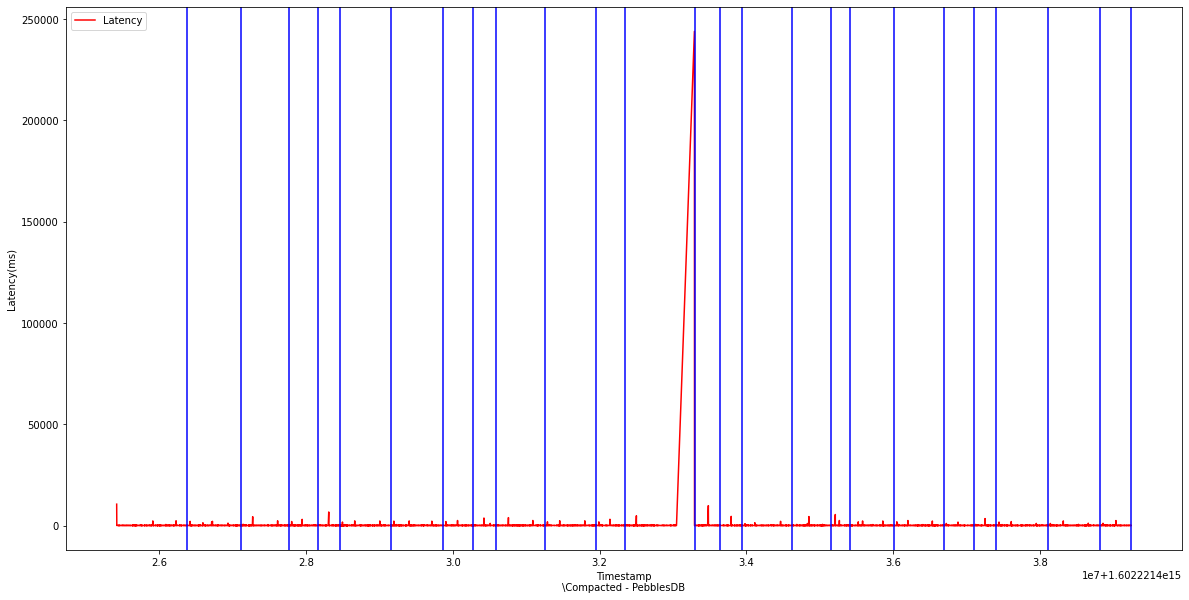

In [7]:
# PebblesDB
import random

level_df = pd.read_csv("/home/shaanzie/pebblesdb-results/pebblesdb-fillrandom-latency.csv", names=['Timestamp', 'Latency'])

compact_done_time = []
compact_start_time = []

flag = 28

with open("/home/shaanzie/pebblesdb-results/LOG", "r") as compact_file:
    for line in compact_file.readlines():
        if("Compacted" in line):
            inp = line.split(";")[0]
            compact_done_time.append(int(inp))
#         if("Compacting" in line):
#             inp = line.split(";")[0]
#             compact_start_time.append(int(inp))
            
plt.figure(figsize=(20,10))
plt.plot(level_df['Timestamp'],level_df['Latency'], label='Latency', color='r')
for xc in compact_done_time:
    plt.axvline(x=xc, color='b')
# for xc in compact_start_time:
#     plt.axvline(x=xc, color='g')
plt.xlabel("Timestamp\n\Compacted - PebblesDB")
plt.ylabel("Latency(ms)")

plt.legend()
plt.savefig("/home/shaanzie/Desktop/LSMTProject/PebblesDB-Compacted.png")
plt.show()

In [6]:
# LevelDB

level_df = pd.read_csv("/home/shaanzie/leveldb-results/leveldb-fillrandom-latency.csv", names=['Timestamp', 'Latency'])

compact_done_time = []
compact_start_time = []

with open("/home/shaanzie/leveldb-results/LOG", "r") as compact_file:
    for line in compact_file.readlines():
        if("compacted" in line):
            inp = line.split(";")[0]
            compact_done_time.append(int(inp))
#         if("Compacting" in line):
#             inp = line.split(";")[0]
#             compact_start_time.append(int(inp))
            
plt.figure(figsize=(20,10))
# plt.plot(level_df['Timestamp'],level_df['Latency'], label='Latency', color='r')
for xc in compact_done_time:
    plt.axvline(x=xc, color='b')
# for xc in compact_start_time:
#     plt.axvline(x=xc, color='g')
# plt.xlabel("Timestamp\n\nLevelDB")
# plt.ylabel("Latency(ms)")
# plt.legend()
# plt.savefig("/home/shaanzie/Desktop/LSMTProject/LevelDB.png")
# plt.show()

def calc99(arr):
    res = []
    for i in range(len(arr)):
        to_consider = arr[i:i+100]
        to_consider.sort()
        try:
            res.append(to_consider[99])
        except:
            pass
    return res

def read(file):
    latency_file = open(file, "r")
    arr = []
    for line in latency_file.readlines():
        arr.append(int(line))
    return arr



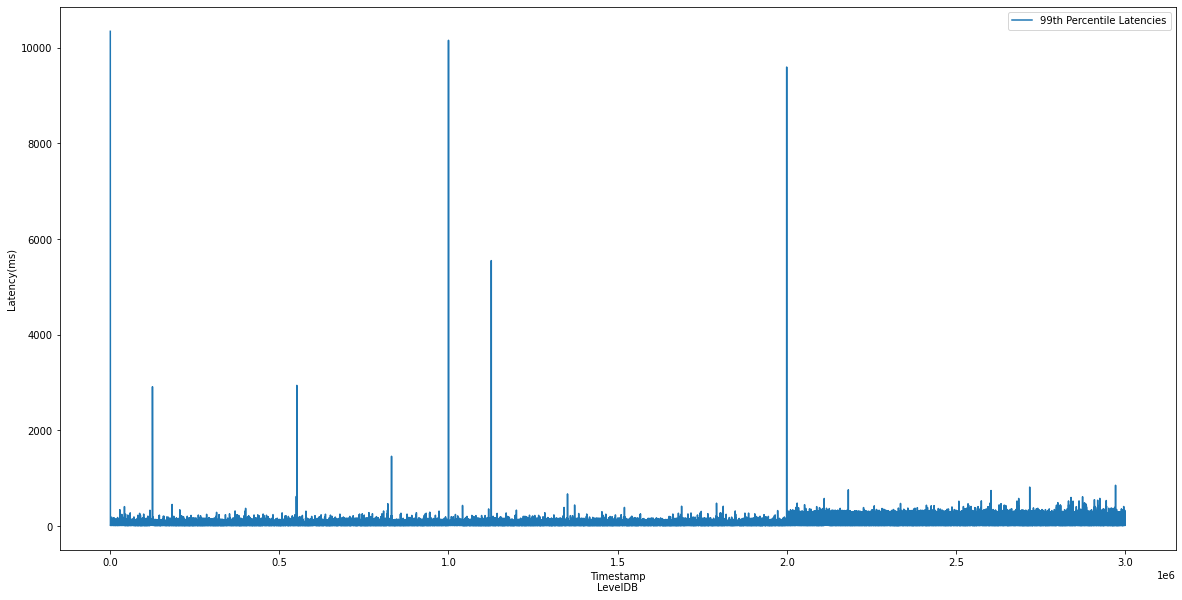

In [11]:
plt.figure(figsize=(20,10))
plt.plot(latency99_arr, label="99th Percentile Latencies")
plt.xlabel("Timestamp\nLevelDB")
plt.ylabel("Latency(ms)")
plt.legend()